<a href="https://colab.research.google.com/github/yuqiw4/GU-ANLY590-HW/blob/master/ANLY_590_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1  Autoencoder

In [0]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

input_img = Input(shape=(28, 28, 1))  # adapt this if using `channels_first` image data format

x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

Using TensorFlow backend.


In [0]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  # adapt this if using `channels_first` image data format

11493376/11490434 [==============================] - 7s 1us/step


In [0]:
autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 7s 120us/step - loss: 0.1297 - val_loss: 0.1292
Epoch 2/10
60000/60000 [==============================] - 7s 118us/step - loss: 0.1250 - val_loss: 0.1271
Epoch 3/10
60000/60000 [==============================] - 7s 118us/step - loss: 0.1215 - val_loss: 0.1190
Epoch 4/10
60000/60000 [==============================] - 7s 113us/step - loss: 0.1188 - val_loss: 0.1162
Epoch 5/10
60000/60000 [==============================] - 7s 112us/step - loss: 0.1162 - val_loss: 0.1142
Epoch 6/10
60000/60000 [==============================] - 7s 112us/step - loss: 0.1150 - val_loss: 0.1117
Epoch 7/10
60000/60000 [==============================] - 7s 111us/step - loss: 0.1133 - val_loss: 0.1104
Epoch 8/10
60000/60000 [==============================] - 7s 111us/step - loss: 0.1121 - val_loss: 0.1076
Epoch 9/10
60000/60000 [==============================] - 7s 112us/step - loss: 0.1110 - val_loss: 0.1

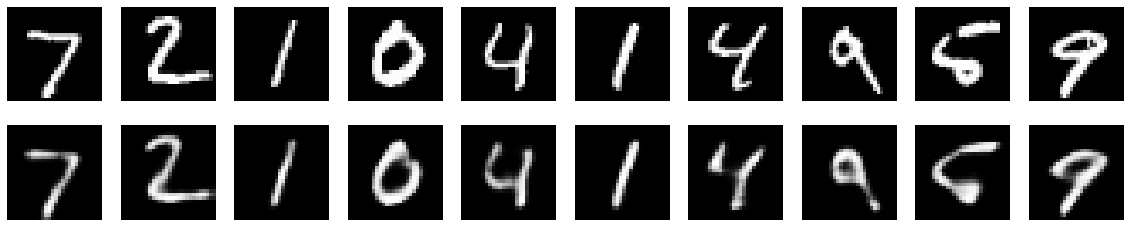

In [0]:
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


## 2  Image Classification
###  2.1 Deep CNN

In [0]:
from keras.applications import VGG16
from keras.preprocessing import image
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from keras.utils import np_utils
import matplotlib.pyplot as plt
plt.viridis()

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)


X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255


Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
model = Sequential()
model.add(Conv2D(filters = 32,kernel_size=(3, 3), 
                 activation='relu', strides=(1, 1), 
                 padding='valid',
                 input_shape=(28,28,1)))
model.add(Conv2D(filters = 64,kernel_size=(3, 3), 
                 activation='relu', strides=(1, 1), 
                 padding='valid'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])

In [0]:
batch_size = 128
num_epoch = 10
#model training
model_training = model.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=num_epoch,
          verbose=1,
          validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 11s 175us/step - loss: 0.2670 - acc: 0.9167 - val_loss: 0.0735 - val_acc: 0.9766
Epoch 2/10
60000/60000 [==============================] - 9s 153us/step - loss: 0.0902 - acc: 0.9733 - val_loss: 0.0433 - val_acc: 0.9847
Epoch 3/10
60000/60000 [==============================] - 9s 150us/step - loss: 0.0666 - acc: 0.9804 - val_loss: 0.0365 - val_acc: 0.9873
Epoch 4/10
60000/60000 [==============================] - 9s 151us/step - loss: 0.0555 - acc: 0.9837 - val_loss: 0.0309 - val_acc: 0.9894
Epoch 5/10
60000/60000 [==============================] - 9s 150us/step - loss: 0.0483 - acc: 0.9861 - val_loss: 0.0270 - val_acc: 0.9904
Epoch 6/10
60000/60000 [==============================] - 9s 151us/step - loss: 0.0424 - acc: 0.9870 - val_loss: 0.0293 - val_acc: 0.9906
Epoch 7/10
60000/60000 [==============================] - 9s 151us/step - loss: 0.0362 - acc: 0.9889 - val_loss: 0.0269 -

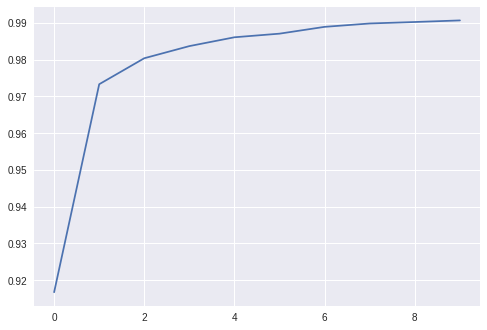

In [0]:
plt.plot(model_training.history["acc"])

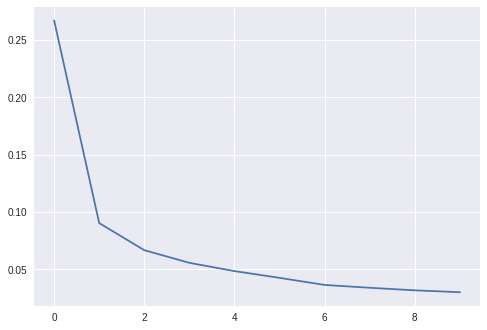

In [0]:
plt.plot(model_training.history["loss"])

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.02731422467695702
Test accuracy: 0.9917


In [0]:
y_hat = model.predict_classes(X_test[:5])
print('Predicted Y:',y_hat)

Predicted Y: [7 2 1 0 4]


In [0]:
y = np.argmax(Y_test[:5], axis = 1)
print('True Y:',y)

True Y: [7 2 1 0 4]


### 2.2 Transfer Learning

In [0]:
from keras.applications import VGG16, InceptionV3, ResNet50, MobileNet
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.optimizers import RMSprop

In [0]:
from skimage.transform import resize

def resize_batch(X, new_size):
    num_images = X.shape[0] # 
    resized_X = np.zeros(shape=(num_images, new_size, new_size)) # final array
    for i in range(num_images):
        resized = resize(X[i], (new_size,new_size)) # 
        resized_X[i,:,:] = resized # 
    return resized_X

In [0]:
from keras.datasets import mnist
import numpy as np
from keras.utils import np_utils


(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = resize_batch(X_train, 32)
X_test = resize_batch(X_test, 32)

X_train = np.stack((X_train,)*3, axis=-1)
X_test = np.stack((X_test,)*3, axis=-1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255


Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


In [0]:
X_test[0].shape

(32, 32, 3)

In [0]:
conv_base = VGG16(weights="imagenet",include_top=False,input_shape=(32,32,3))

58892288/58889256 [==============================] - 6s 0us/step


In [0]:
model = Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(10, activation="sigmoid"))

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 1, 1, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 14,719,818
Trainable params: 14,719,818
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.trainable_weights

[<tf.Variable 'block1_conv1/kernel:0' shape=(3, 3, 3, 64) dtype=float32_ref>,
 <tf.Variable 'block1_conv1/bias:0' shape=(64,) dtype=float32_ref>,
 <tf.Variable 'block1_conv2/kernel:0' shape=(3, 3, 64, 64) dtype=float32_ref>,
 <tf.Variable 'block1_conv2/bias:0' shape=(64,) dtype=float32_ref>,
 <tf.Variable 'block2_conv1/kernel:0' shape=(3, 3, 64, 128) dtype=float32_ref>,
 <tf.Variable 'block2_conv1/bias:0' shape=(128,) dtype=float32_ref>,
 <tf.Variable 'block2_conv2/kernel:0' shape=(3, 3, 128, 128) dtype=float32_ref>,
 <tf.Variable 'block2_conv2/bias:0' shape=(128,) dtype=float32_ref>,
 <tf.Variable 'block3_conv1/kernel:0' shape=(3, 3, 128, 256) dtype=float32_ref>,
 <tf.Variable 'block3_conv1/bias:0' shape=(256,) dtype=float32_ref>,
 <tf.Variable 'block3_conv2/kernel:0' shape=(3, 3, 256, 256) dtype=float32_ref>,
 <tf.Variable 'block3_conv2/bias:0' shape=(256,) dtype=float32_ref>,
 <tf.Variable 'block3_conv3/kernel:0' shape=(3, 3, 256, 256) dtype=float32_ref>,
 <tf.Variable 'block3_conv3

In [0]:
conv_base.trainable = False

In [0]:
model.trainable_weights

[<tf.Variable 'dense_3/kernel:0' shape=(512, 10) dtype=float32_ref>,
 <tf.Variable 'dense_3/bias:0' shape=(10,) dtype=float32_ref>]

In [0]:
model.compile(optimizer='Adam',loss="binary_crossentropy",metrics=["accuracy"])

Since it is very time-consuming to train even one epoch and I found out that the accuarcy will not increase while the number of epoch increases. Thus, I just use 5 as the number of epochs.

In [0]:
batch_size = 128
num_epoch = 5

#model training
model_training = model.fit(X_train, Y_train,
                           epochs=num_epoch, 
                           batch_size = batch_size,
                           validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 23s 391us/step - loss: 0.3359 - acc: 0.8941 - val_loss: 0.3249 - val_acc: 0.9000
Epoch 2/5
60000/60000 [==============================] - 22s 363us/step - loss: 0.3249 - acc: 0.9000 - val_loss: 0.3246 - val_acc: 0.9000
Epoch 3/5
60000/60000 [==============================] - 22s 366us/step - loss: 0.3246 - acc: 0.9000 - val_loss: 0.3243 - val_acc: 0.9000
Epoch 4/5
60000/60000 [==============================] - 23s 391us/step - loss: 0.3243 - acc: 0.9000 - val_loss: 0.3240 - val_acc: 0.9000
Epoch 5/5
60000/60000 [==============================] - 23s 388us/step - loss: 0.3241 - acc: 0.9000 - val_loss: 0.3236 - val_acc: 0.9000


In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.3235890708446503
Test accuracy: 0.8999999761581421


## 3 Text Classification

### 3.1 RNN

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
%matplotlib inline

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
benign_text = []
with open('/content/drive/My Drive/Colab Notebooks/benign-urls.txt') as f:
    for line in f:
        if line[0] != '#':
            benign_text.append(line.strip())

benign_n = len(benign_text)
print(benign_n)
print(benign_text[:10])


print()

malicious_text = []
with open('/content/drive/My Drive/Colab Notebooks/malicious-urls.txt') as f:
    for line in f:
        if line[0] != '#':
            malicious_text.append(line.strip())
            
malicious_n = len(malicious_text)
print(malicious_n)
print(malicious_text[:10])

X = benign_text + malicious_text
Y = [0]*benign_n + [1]*malicious_n

66015
['.0.blogger.gmodules.com', '.0.client-channel.google.com', '.0.docs.google.com', '.0.drive.google.com', '.0.gvt0.cn', '.0.gvt0.com', '.10.client-channel.google.com', '.10.docs.google.com', '.10.drive.google.com', '.11.client-channel.google.com']

1296
['.1337x.pl', '.1link.io', '.1n.pm', '.22apple.com', '.22find.com', '.2s5m19yk.ru', '.301.li', '.3utilities.com', '.44d.info', '.4everproxy.co']


In [0]:
from string import printable

X_token = [[printable.index(x) + 1 for x in url if x in printable] for url in X]

max_len = 100
X = sequence.pad_sequences(X_token, maxlen=max_len)

Y = np.array(Y)

print('Matrix dimensions of X: ', X.shape, 'Vector dimension of target: ', Y.shape)

Matrix dimensions of X:  (67311, 100) Vector dimension of target:  (67311,)


In [0]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

In [0]:
max_len = 100
max_words = 1000

model = Sequential()
model.add(Embedding(max_words, 50, input_length=max_len))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 50)           50000     
_________________________________________________________________
dropout_3 (Dropout)          (None, 100, 50)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               60400     
_________________________________________________________________
dropout_4 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 101       
Total params: 110,501
Trainable params: 110,501
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
model.fit(X_train, Y_train, epochs=5, batch_size=512)

Epoch 1/5
53848/53848 [==============================] - 31s 574us/step - loss: 0.1518 - acc: 0.9786
Epoch 2/5
53848/53848 [==============================] - 29s 544us/step - loss: 0.0968 - acc: 0.9804
Epoch 3/5
53848/53848 [==============================] - 30s 555us/step - loss: 0.0940 - acc: 0.9804
Epoch 4/5
53848/53848 [==============================] - 29s 545us/step - loss: 0.0651 - acc: 0.9807
Epoch 5/5
53848/53848 [==============================] - 30s 551us/step - loss: 0.0367 - acc: 0.9825


In [0]:
y_hat = model.predict_classes(X_test)

In [0]:
!pip install pandas_ml

    100% |████████████████████████████████| 81kB 3.1MB/s 
  Running setup.py bdist_wheel for pandas-ml ... - \ done
  Stored in directory: /root/.cache/pip/wheels/4b/b0/88/51fb7203a0f81becae3e92d5bf9fee0460375e5408e67a7dc3
Successfully built pandas-ml


In [0]:
from pandas_ml import ConfusionMatrix
import matplotlib.pyplot as plt

cm = ConfusionMatrix(Y_test, y_hat[:,0])
cm

Predicted  False  True  __all__
Actual                         
False      13198    26    13224
True         168    71      239
__all__    13366    97    13463

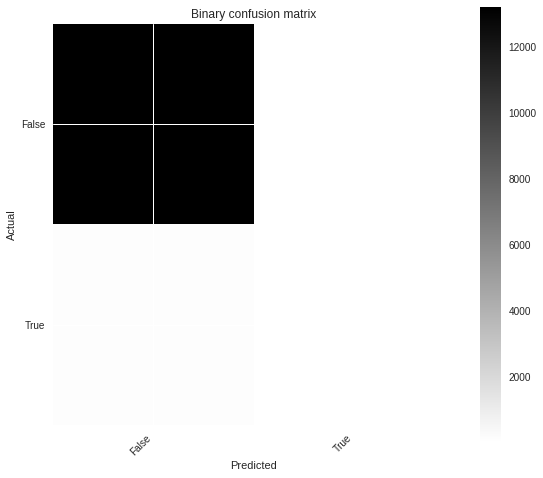

In [0]:
cm.plot()
plt.show()

In [0]:
from sklearn.metrics import roc_curve
from sklearn import metrics
y_pred_rf = model.predict_proba(X_test)[:, 0]
fpr_rf, tpr_rf, _ = roc_curve(Y_test, y_pred_rf)

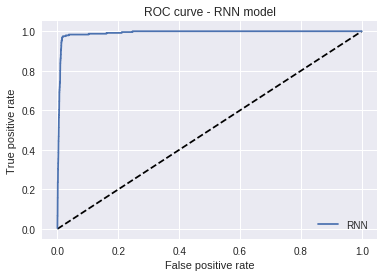

In [0]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='RNN')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - RNN model')
plt.legend(loc='best')
plt.show()

In [0]:
metrics.auc(fpr_rf,tpr_rf)

0.9918289176266304

### 3.2 CNN

In [0]:
from keras.layers.core import Dense, Dropout, Activation, Lambda, Flatten
from keras.layers import  Conv1D, MaxPooling1D

#X_train,X_test,Y_train,Y_test

In [0]:
from keras.models import Sequential

model_CNN = Sequential()
model_CNN.add(Embedding(max_words, 50, input_length=max_len))
model_CNN.add(Dropout(0.5))
model_CNN.add(Conv1D(filters = 64,kernel_size=5, activation='relu'))
model_CNN.add(MaxPooling1D(pool_size=5))
model_CNN.add(Flatten())
model_CNN.add(Dense(10, activation='relu'))
model_CNN.add(Dropout(0.5))
model_CNN.add(Dense(1, activation='sigmoid'))

In [0]:
model_CNN.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 50)           50000     
_________________________________________________________________
dropout_5 (Dropout)          (None, 100, 50)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 96, 64)            16064     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 19, 64)            0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1216)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                12170     
_________________________________________________________________
dropout_6 (Dropout)          (None, 10)                0         
__________

In [0]:
model_CNN.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [0]:
model_CNN.fit(X_train, Y_train, epochs=5, batch_size=512)

Epoch 1/5
53848/53848 [==============================] - 3s 51us/step - loss: 0.1327 - acc: 0.9735
Epoch 2/5
53848/53848 [==============================] - 2s 34us/step - loss: 0.0853 - acc: 0.9804
Epoch 3/5
53848/53848 [==============================] - 2s 34us/step - loss: 0.0609 - acc: 0.9804
Epoch 4/5
53848/53848 [==============================] - 2s 35us/step - loss: 0.0456 - acc: 0.9804
Epoch 5/5
53848/53848 [==============================] - 2s 34us/step - loss: 0.0383 - acc: 0.9804


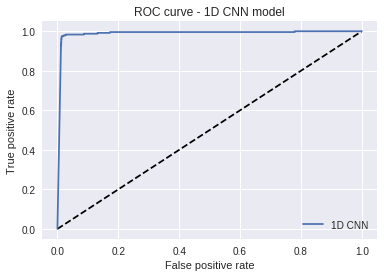

In [0]:
y_pred_rf = model_CNN.predict_proba(X_test)[:, 0]
fpr_rf, tpr_rf, _ = roc_curve(Y_test, y_pred_rf)

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='1D CNN')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - 1D CNN model')
plt.legend(loc='best')
plt.show()

In [0]:
metrics.auc(fpr_rf,tpr_rf)

0.9888819491377412